In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../data/test.csv')
df.head(5)
index_start = df.columns.get_loc('Action')
index_end = df.columns.get_loc('Western')

print(index_start)
print(index_end)

6
32


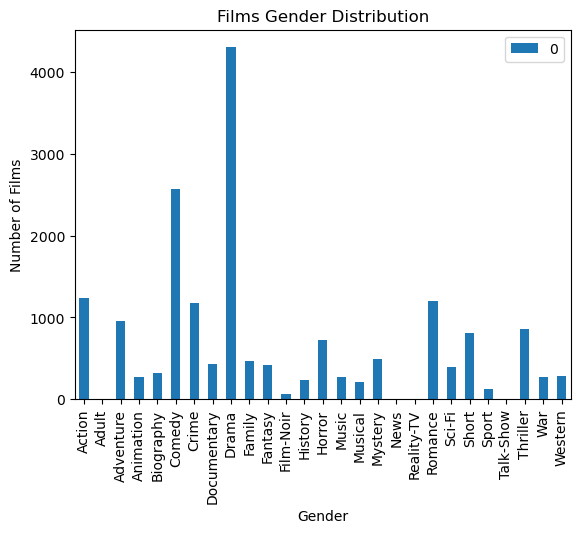

In [10]:
# print gender distribuition chart
generos_df = df.iloc[:, index_start:index_end+1]
soma_generos = generos_df.sum()
soma_generos_df = soma_generos.to_frame()
soma_generos_df.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Number of Films")
plt.title("Films Gender Distribution")
plt.show()

In [11]:
df.iloc[:, index_start:index_end+1].sum()

Action         1235
Adult             1
Adventure       955
Animation       277
Biography       321
Comedy         2574
Crime          1176
Documentary     436
Drama          4303
Family          463
Fantasy         418
Film-Noir        67
History         240
Horror          718
Music           273
Musical         212
Mystery         492
News              4
Reality-TV        1
Romance        1203
Sci-Fi          390
Short           805
Sport           128
Talk-Show         2
Thriller        854
War             269
Western         279
dtype: int64

In [12]:
# remove movies with insignificant representation data (under de 200 entries)- Adult, Film-Noir, News, Reality TV, Talk Show,Sport
genres_to_remove = ['Adult', 'Film-Noir', 'News', 'Reality-TV', 'Talk-Show','Sport'];
entries_to_remove = df.loc[(df[genres_to_remove] == 1).any(axis=1)]

df = df.drop(entries_to_remove.index, axis=0)
df.drop(genres_to_remove, axis=1, inplace=True)

index_start = df.columns.get_loc('Action')
index_end = df.columns.get_loc('Western')
df.iloc[:, index_start:index_end+1].sum()

Action         1228
Adventure       952
Animation       277
Biography       308
Comedy         2534
Crime          1116
Documentary     417
Drama          4170
Family          452
Fantasy         417
History         238
Horror          718
Music           272
Musical         208
Mystery         484
Romance        1185
Sci-Fi          389
Short           802
Thriller        845
War             268
Western         279
dtype: int64

In [14]:
# Grouping genders to bigger categories to better distribute the data

df['Action and Adventure'] = df[['Action', 'Adventure', 'War', 'Western']].max(axis=1)
df['Documentary and History'] = df[['Documentary', 'History', 'Biography']].max(axis=1)
df['Family and Animation'] = df[['Family', 'Animation']].max(axis=1)
df['Fantasy and Sci-Fi'] = df[['Fantasy', 'Sci-Fi']].max(axis=1)
df['Musical'] = df[['Music', 'Musical']].max(axis=1)
df['Horror and Thriller'] = df[['Horror', 'Thriller', 'Mystery']].max(axis=1)


df = df.drop(columns=['Adventure', 'War', 'Western','Documentary', 'History', 'Biography','Family', 'Animation', 'Fantasy', 'Sci-Fi', 'Music', 'Musical', 'Horror', 'Thriller', 'Mystery'])

coluna = 'Description Tokenized'

novas_colunas = [col for col in df.columns if col != coluna] + [coluna]

df = df[novas_colunas]

pd.set_option("display.max_columns", None)
df.head(5)

,Name,Date Published,Description,Rating,Rating Count,Content Rating,Action,Comedy,Crime,Drama,Romance,Short,Action and Adventure,Documentary and History,Family and Animation,Fantasy and Sci-Fi,Horror and Thriller,Description Tokenized
0,Spartacus,12/09/1961,The slave Spartacus survives brutal training a...,7.9,137086.0,M/12,0,0,0,1,0,0,1,1,0,0,0,"['slave', 'spartacus', 'survives', 'brutal', '..."
1,Psycho,22/11/1960,"A Phoenix secretary embezzles $40,000 from her...",8.5,679349.0,M/12,0,0,0,0,0,0,0,0,0,0,1,"['phoenix', 'secretary', 'embezzles', 'employe..."
2,Exodus,03/03/1965,"The State of Israel is created in 1948, result...",6.7,10301.0,Approved,1,0,0,1,0,0,1,0,0,0,0,"['state', 'israel', 'created', 'resulting', 'w..."
3,Butterfield,NaN,"After the loss of his father, a 12-year-old bo...",NaN,NaN,NaN,0,0,0,1,0,1,0,0,0,0,0,"['loss', 'father', 'year', 'old', 'boy', 'stru..."
4,From the Terrace,10/06/1960,An ambitious young executive chooses a loveles...,6.7,2925.0,M/12,0,0,0,1,1,0,0,0,0,0,0,"['ambitious', 'young', 'executive', 'chooses',..."


In [15]:
index_start = df.columns.get_loc('Action')
index_end = df.columns.get_loc('Horror and Thriller')
df.iloc[:, index_start:index_end+1].sum()

Action                     1228
Comedy                     2534
Crime                      1116
Drama                      4170
Romance                    1185
Short                       802
Action and Adventure       2215
Documentary and History     840
Family and Animation        671
Fantasy and Sci-Fi          792
Horror and Thriller        1664
dtype: int64

In [20]:
# plot nre gender distribution

generos_df = df.iloc[:, index_start:index_end]
soma_generos = generos_df.sum()
soma_generos_df = soma_generos.to_frame()
soma_generos_df.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Number of Films")
plt.title("Gender Films Distribution")
plt.show()


6
16


In [18]:
df.to_csv('../data/test_gender_fusion.csv', )

In [23]:
df.head(5)

,Name,Date Published,Description,Rating,Rating Count,Content Rating,Action,Comedy,Crime,Drama,Romance,Short,Action and Adventure,Documentary and History,Family and Animation,Fantasy and Sci-Fi,Horror and Thriller,Description Tokenized
0,Spartacus,12/09/1961,The slave Spartacus survives brutal training a...,7.9,137086.0,M/12,0,0,0,1,0,0,1,1,0,0,0,"['slave', 'spartacus', 'survives', 'brutal', '..."
1,Psycho,22/11/1960,"A Phoenix secretary embezzles $40,000 from her...",8.5,679349.0,M/12,0,0,0,0,0,0,0,0,0,0,1,"['phoenix', 'secretary', 'embezzles', 'employe..."
2,Exodus,03/03/1965,"The State of Israel is created in 1948, result...",6.7,10301.0,Approved,1,0,0,1,0,0,1,0,0,0,0,"['state', 'israel', 'created', 'resulting', 'w..."
3,Butterfield,NaN,"After the loss of his father, a 12-year-old bo...",NaN,NaN,NaN,0,0,0,1,0,1,0,0,0,0,0,"['loss', 'father', 'year', 'old', 'boy', 'stru..."
4,From the Terrace,10/06/1960,An ambitious young executive chooses a loveles...,6.7,2925.0,M/12,0,0,0,1,1,0,0,0,0,0,0,"['ambitious', 'young', 'executive', 'chooses',..."
